In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df=pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [34]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [35]:
df['species']=df['species'].replace({'setosa':0,'versicolor':1,'virginica':2})

In [36]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [37]:
corr_matrix=df.corr()
corr_matrix['species'].sort_values(ascending=False)

species         1.000000
petal_width     0.956464
petal_length    0.949043
sepal_length    0.782561
sepal_width    -0.419446
Name: species, dtype: float64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [39]:
df.duplicated().sum()

3

In [40]:
df=df.drop_duplicates()

In [41]:
df.shape

(147, 5)

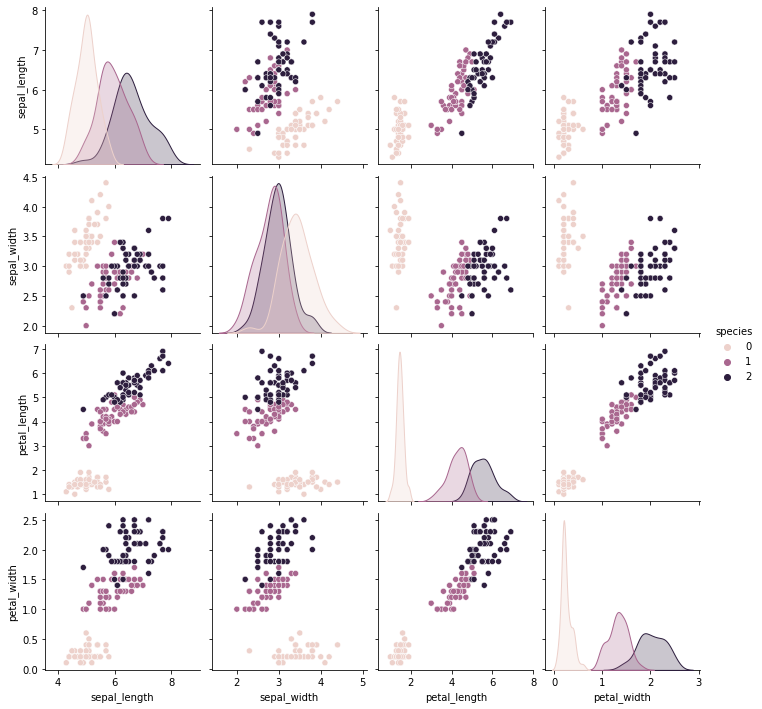

In [42]:
sns.pairplot(df,hue='species')

<AxesSubplot:xlabel='petal_width', ylabel='Count'>

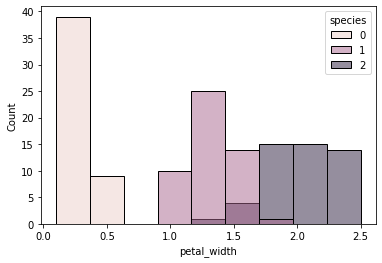

In [43]:
sns.histplot(data=df,x='petal_width',hue='species')

In [44]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<AxesSubplot:>

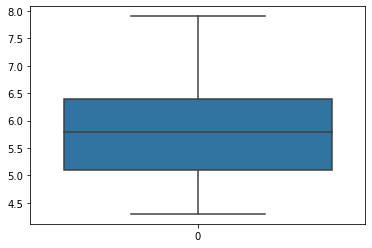

In [45]:
sns.boxplot(df['sepal_length'])

<AxesSubplot:>

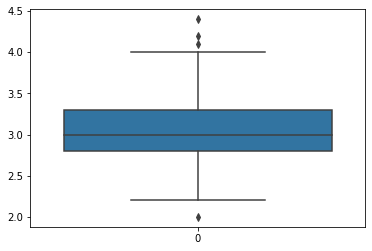

In [46]:
sns.boxplot(df['sepal_width'])

In [47]:
df['sepal_width'].mean()

3.05578231292517

In [48]:
df[df['sepal_width']<2.2]

,sepal_length,sepal_width,petal_length,petal_width,species
60,5.0,2.0,3.5,1.0,1


In [49]:
df.shape

(147, 5)

In [50]:
df=df[df['sepal_width']>2.2]
df.shape

(143, 5)

In [54]:
df[df['sepal_width']>4.0]

,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,0
32,5.2,4.1,1.5,0.1,0
33,5.5,4.2,1.4,0.2,0


In [55]:
df=df[df['sepal_width']<4.0]

In [56]:
df.shape

(139, 5)

<AxesSubplot:>

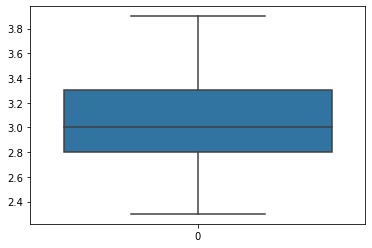

In [58]:
sns.boxplot(df['sepal_width'])

<AxesSubplot:>

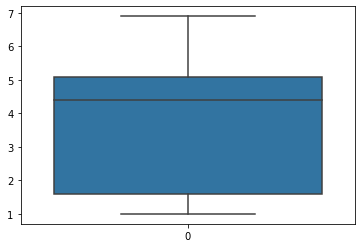

In [59]:
sns.boxplot(df['petal_length'])

<AxesSubplot:>

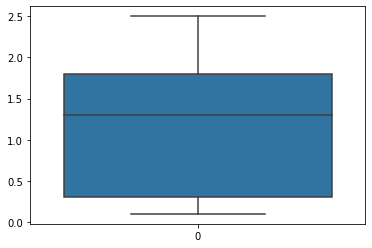

In [60]:
sns.boxplot(df['petal_width'])

In [61]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,139.000000,139.000000,139.000000,139.000000,139.000000
mean,5.866906,3.049640,3.835252,1.235971,1.028777
std,0.846424,0.375591,1.758040,0.759386,0.815986
min,4.300000,2.300000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.450000,3.300000,5.100000,1.800000,2.000000
max,7.900000,3.900000,6.900000,2.500000,2.000000


In [62]:
X=df.drop('species',axis=1)
y=df['species']

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [64]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [65]:
from sklearn.neighbors import KNeighborsClassifier
model1=KNeighborsClassifier()

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
scores=[]
for i in range (1,10):
    model11=KNeighborsClassifier(n_neighbors=i)
    model11.fit(X_train,y_train)
    y_pred1=model11.predict(X_test)
    scores.append(accuracy_score(y_pred1,y_test))

In [68]:
scores

[0.9523809523809523,
 0.9761904761904762,
 1.0,
 1.0,
 0.9761904761904762,
 1.0,
 0.9761904761904762,
 0.9761904761904762,
 0.9761904761904762]

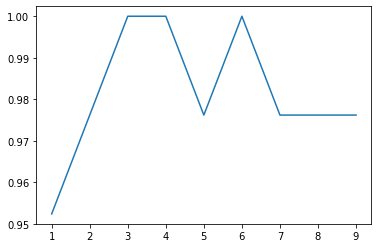

In [69]:
plt.plot(range(1,10),scores)

In [70]:
from sklearn.model_selection import GridSearchCV
grid1=GridSearchCV(model1,{'n_neighbors':[3,4,5]})
grid1.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5]})

In [71]:
grid1.best_params_

{'n_neighbors': 3}

In [72]:
y_pred11=grid1.predict(X_test)

In [73]:
from sklearn.metrics import classification_report,confusion_matrix

In [76]:
print(classification_report(y_pred11,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        13

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



In [77]:
grid1.score(X_test,y_test)

1.0

In [78]:
grid1.score(X_train,y_train)

0.9587628865979382

In [79]:
y_pred1

array([2, 1, 0, 2, 0, 0, 1, 2, 2, 1, 2, 2, 1, 0, 1, 1, 0, 0, 2, 2, 0, 2,
       1, 0, 1, 0, 2, 1, 0, 0, 0, 1, 2, 1, 2, 1, 1, 1, 2, 0, 2, 0],
      dtype=int64)